# Dataset: Symbol-Level Simulation

## Set up the Environment

In [93]:
import os
import sys
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

## Read the parameter *.csv* files

In [94]:
df = pd.read_csv(r'../datasets/rx_1/param_0_1_1.csv')

fc = float(df['fc'])    # carrier frequnecy in Hz
fs = float(df['fs'])    # sampling frequency in Hz
nit = int(df['nit'])    # num of iterations
nrx = int(df['nrx'])    # num of rx antennas
nsnr = int(df['nsnr'])  # num of snr points
nx = int(df['nx'])      # num of samples
ndsgn = 4

## Read the receiver input data

In [95]:
df = pd.read_csv(r'../datasets/rx_1/idata_1.csv')

# Random tx data
x = np.char.replace(np.array(df['x'],dtype=str),'i','j').astype(np.complex)

# Channel w
w = np.array([np.char.replace(np.array(df['w_'+str(i+1)],dtype=str),'i','j').astype(np.complex)
              for i in range(nrx)])

# Received data with no noise
y = np.array([np.char.replace(np.array(df['y_'+str(i+1)],dtype=str),'i','j').astype(np.complex)
              for i in range(nrx)])

# Received data at the antenna at various rx power levels
r = np.array([np.char.replace(np.array(df['yant_'+str(isnr*nrx+irx+1)],dtype=str),'i','j').astype(np.complex)
              for irx in range(nrx) for isnr in range(nsnr) ]).reshape(nrx,nsnr,nx)

# Print the data shapes
print(f'x shape: {x.shape}')
print(f'w shape: {w.shape}')
print(f'y shape: {y.shape}')
print(f'r shape: {r.shape}')

x shape: (10000,)
w shape: (16, 10000)
y shape: (16, 10000)
r shape: (16, 31, 10000)


## Read the output data

In [96]:
y_rffe = np.zeros([nrx, nsnr,nx, ndsgn], dtype=complex)
x_hat = np.zeros([nsnr,nx, ndsgn], dtype=complex)

for id in range(ndsgn):
  df = pd.read_csv(r'../datasets/rx_1/odata_'+str(id+1)+'_1.csv')

  # Read the output of the RFFE
  y_rffe[:,:,:,id] = np.array([np.char.replace(np.array(df['yrffe_'+str(isnr*nrx+irx+1)],dtype=str),'i','j').astype(np.complex)
                     for irx in range(nrx) for isnr in range(nsnr)]).reshape(nrx,nsnr,nx)

  # Predicted tx data at various SNR
  x_hat[:,:,id] = np.array([np.char.replace(np.array(df['xhat_'+str(i+1)],dtype=str),'i','j').astype(np.complex)
                for i in range(nsnr)]).reshape(nsnr,nx)

# Print the data shapes
print(f'y_rffe shape: {y_rffe.shape}')
print(f'x_hat shape: {x_hat.shape}')

Phi(r) shape: (16, 31, 10000, 4)
x_hat shape: (31, 10000, 4)


## Plot the AM/AM and AM/PM

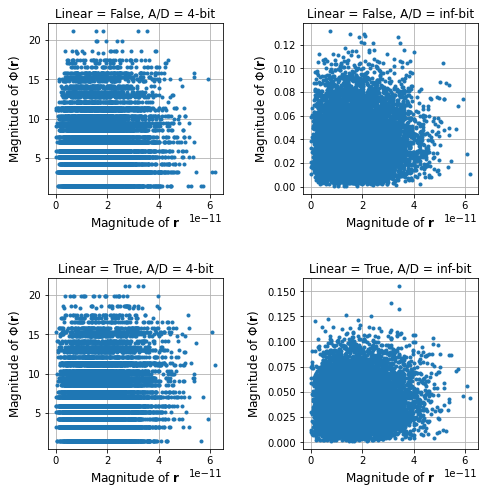

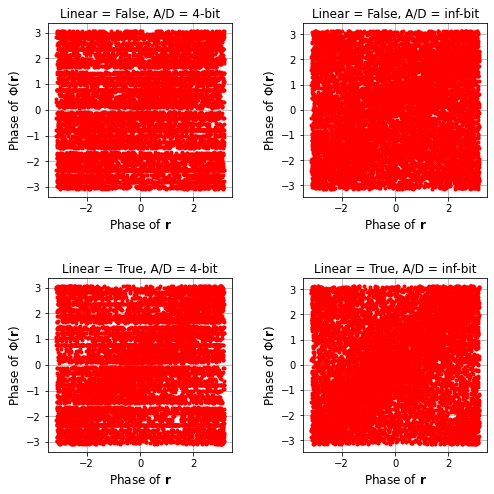

In [119]:
irx = 0
isnr = 0
plt.rcParams["figure.figsize"] = (7.5, 7.5)
for id in range(ndsgn):
  plt.subplot(2,2,id+1)
  plt.plot(np.abs(r[irx,isnr,:]), np.abs(y_rffe[irx,isnr,:,id]), '.')
  plt.ylabel('Magnitude of $\Phi(\mathbf{r})$', fontsize=12)
  plt.xlabel('Magnitude of $\mathbf{r}$', fontsize=12)
  if id == 0 or id == 1:
      str = 'Linear = False, '
  else:
      str = 'Linear = True, '

  if id == 0 or id == 2:
      str = str + 'A/D = 4-bit'
  else:
      str = str + 'A/D = inf-bit'

  plt.title(str)
  plt.grid()

plt.tight_layout(pad=3.0)
plt.show()

plt.rcParams["figure.figsize"] = (7.5, 7.5)
for id in range(ndsgn):
  plt.subplot(2,2,id+1)
  plt.plot(np.angle(r[irx,isnr,:]), np.angle(y_rffe[irx,isnr,:,id]), 'r.')
  plt.ylabel('Phase of $\Phi(\mathbf{r})$', fontsize=12)
  plt.xlabel('Phase of $\mathbf{r}$', fontsize=12)
  if id == 0 or id == 1:
      str = 'Linear = False, '
  else:
      str = 'Linear = True, '
  if id == 0 or id == 2:
      str = str + 'A/D = 4-bit'
  else:
      str = str + 'A/D = inf-bit'
  plt.title(str)
  plt.grid()

plt.tight_layout(pad=3.0)
plt.show()